# Part 1 - Linear SVM
the specified parameters of SVM: **$C = 10$ **

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

In [26]:
def get_data():
    data = np.loadtxt("iris.txt")
    iris_data = data[50:]
    return iris_data

def get_train_and_test(feature):
    iris_data = get_data()

    positive_data = iris_data[:50, feature]
    positive_data = np.expand_dims(positive_data, axis=2)

    negative_data = iris_data[50:, feature]
    negative_data = np.expand_dims(negative_data, axis=2)

    train_data_positive = positive_data[:25]
    train_data_negative = negative_data[:25]

    test_data_positive = positive_data[25:]
    test_data_negative = negative_data[25:]

    train_data = np.concatenate((train_data_positive, train_data_negative), axis=0)
    test_data = np.concatenate((test_data_positive, test_data_negative), axis=0)

    train_label = [1] * len(train_data_positive) + [-1] * len(train_data_negative)
    test_label = [1] * len(test_data_positive) + [-1] * len(test_data_negative)

    train_label_plot = ['positive'] * len(train_data_positive) + ['negative'] * len(train_data_negative)
    test_label_plot = ['positive'] * len(test_data_positive) + ['negative'] * len(test_data_negative)

    return(train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot)

def get_test_and_train(feature):
    iris_data = get_data()

    positive_data = iris_data[:50, feature]
    positive_data = np.expand_dims(positive_data, axis=2)

    negative_data = iris_data[50:, feature]
    negative_data = np.expand_dims(negative_data, axis=2)

    train_data_positive = positive_data[25:]
    train_data_negative = negative_data[25:]

    test_data_positive = positive_data[:25]
    test_data_negative = negative_data[:25]

    train_data = np.concatenate((train_data_positive, train_data_negative), axis=0)
    test_data = np.concatenate((test_data_positive, test_data_negative), axis=0)

    train_label = [1] * len(train_data_positive) + [-1] * len(train_data_negative)
    test_label = [1] * len(test_data_positive) + [-1] * len(test_data_negative)

    train_label_plot = ['positive'] * len(train_data_positive) + ['negative'] * len(train_data_negative)
    test_label_plot = ['positive'] * len(test_data_positive) + ['negative'] * len(test_data_negative)

    return(train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot)


In [3]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

In [11]:
from svm import LinearSVM

linear_svm = LinearSVM()
linear_svm.fit(train_data, train_label)

alpha = linear_svm.alpha
bias = linear_svm.bias

print('alpha:')
for index in range(len(alpha)):
    print('    {}'.format(round(alpha[index][0], 4)))

print('bias:\n    {}'.format(bias[0, 0]))

alpha:
    0.0
    0.0
    9.0
    0.0
    0.0
    0.0
    10.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    10.0
    0.0
    9.0
    0.0
    0.0
    0.0
    8.0
    0.0
    0.0
    0.0
    0.0
    10.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    10.0
    0.0
    0.0
    0.0
    10.0
    0.0
bias:
    15.139933904343767


In [21]:
accuracy_1 = linear_svm.evaluate(test_data, test_label)
print('Accuracy is: {}%'.format(accuracy_1))

Accuracy is: 96.0%


[Text(0, 0.5, 'Feature 4'), Text(0.5, 0, 'Feature 3')]

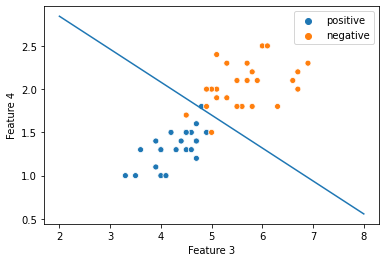

In [22]:
weight, bias = linear_svm.weight, linear_svm.bias
hyperplane_x, hyperplane_y = linear_svm.get_hyperplane_points(2, 8)

plt.plot(hyperplane_x, hyperplane_y)
sns.scatterplot(x=train_data[:, 0, 0], y=train_data[:, 1, 0], hue=train_label_plot).set(xlabel='Feature 3', ylabel='Feature 4')

In [27]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

In [28]:
from svm import LinearSVM

linear_svm = LinearSVM()
linear_svm.fit(train_data, train_label)

alpha = linear_svm.alpha
bias = linear_svm.bias

print('alpha:')
for index in range(len(alpha)):
    print('    {}'.format(round(alpha[index][0], 4)))

print('bias:\n    {}'.format(bias[0, 0]))

alpha:
    0.0
    0.0
    10.0
    0.0
    0.0
    0.0
    0.0
    0.0
    10.0
    0.0
    8.7778
    10.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    10.0
    8.5555
    0.0
    0.0
    0.0
    0.0
    0.0
    10.0
    0.2222
    0.0
    0.0
    0.0
    10.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
bias:
    22.266670873367527


In [30]:
accuracy_2 = linear_svm.evaluate(test_data, test_label)
print('Accuracy is: {}%'.format(accuracy_2))

Accuracy is: 94.0%


[Text(0, 0.5, 'Feature 4'), Text(0.5, 0, 'Feature 3')]

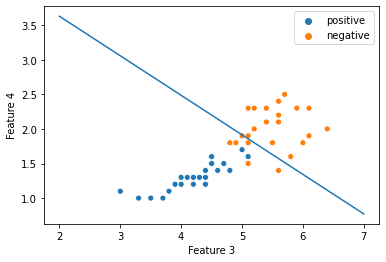

In [32]:
weight, bias = linear_svm.weight, linear_svm.bias
hyperplane_x, hyperplane_y = linear_svm.get_hyperplane_points(2, 7)

plt.plot(hyperplane_x, hyperplane_y)
sns.scatterplot(x=train_data[:, 0, 0], y=train_data[:, 1, 0], hue=train_label_plot).set(xlabel='Feature 3', ylabel='Feature 4')

In [34]:
accuracy = (accuracy_1 + accuracy_2)/2
print('Accuracy is: {}%'.format(accuracy))

Accuracy is: 95.0%
